# Say hello to machine learning in Python

## Basic machine learning tutorial, using scikit-learn library

### @ PyConPL 2018

# Table of Contents

[1 Introduction to Machine Learning](#1-Introduction-to-Machine-Learning)<br/>
[2 Introduction to classification](#2-Introduction-to-classification)<br/>
[3 Introduction to regression](#3-Introduction-to-regression)<br/>
[4 Project time](#4-Project-time)

### Imports

A few libraries that will be used by use during the workshop. <br/>
(please confirm that you can import all of them successfully, some instructions on that can be found in readme).

In [19]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

### Some "global" variables

In [76]:
RANDOM_SEED = 42
STARTUPS_DATASET_PATH = './data/startups.csv'
ORTHOPEDIC_PATIENTS_DATASET_PATH = './data/orthopedic_patients_2C.csv'  # dunno yet if 2C or 3C will be used

# 1 Introduction to Machine Learning

# 2 Introduction to classification

<b>Note:</b> all concepts, that are present/described here, will be more fully described during workshop and on slides.

### Dataset loading

In [6]:
from sklearn.datasets import load_iris


iris_dataset = load_iris()
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [7]:
X = iris.data
y = iris.target

X = X[:, :2]

In [8]:
X[: 5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [9]:
y[: 5]

array([0, 0, 0, 0, 0])

### Data preparation - class label encoding

It is already done by scikit, so this section might be possibly removed.

### Train/test split

In [12]:
from sklearn.model_selection import train_test_split

Default split...

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)


print('Class labels:', np.unique(y_train))
print('Class counts:', np.unique(y_train, return_counts=True)[1])

Class labels: [0 1 2]
Class counts: [35 39 38]


... vs stratified (balanced) split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED,
                                                   stratify=y)


print('Class labels:', np.unique(y_train))
print('Class counts:', np.unique(y_train, return_counts=True)[1])

Class labels: [0 1 2]
Class proportions: [38 37 37]


### Model Fitting

In [26]:
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Model evaluation

In [25]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


y_test_pred = knn_clf.predict(X_test)
accuracy(y_test, y_test_pred)

0.8157894736842105

Instead of writing this code by ourselves, we can use scikit help in this case too - it contains implementations of most popular metrics (some of which are much more complex and harder to code than used accuracy).

In [24]:
from sklearn.metrics import accuracy_score


y_test_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.8157894736842105

Log reg

In [70]:
from sklearn.linear_model import LogisticRegression


### Model hyperparameters

In [69]:
# TODO (k of knn)

### Exercises
- Explore in more exhaustive way, how the change of k parameter in KNN classifier affects achieved accuracy. Fit the classifier with all possible k values in range [1, 3, 5 ... 51] and check the accuracy. <br/> Bonus: Plot the results you obtained.
- Fit the data using yet another classifier - Decision Tree (located in sklearn.tree). Do you need to change much of a code to test another algorithm?
- Remember how we selected only first two features of Iris dataset after loading? It was done for visualisation purposes, but more features can definitely help us improve our score. Investigate how the different models will perform using data with all features. <br/>Bonus: After that, you can also play with the hyperparameters - try to obtain as high accuracy on test set as possible.

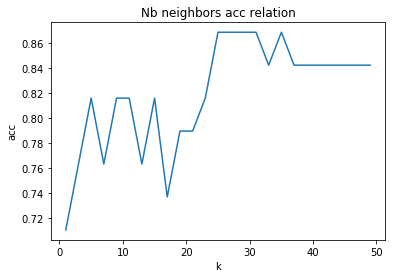

In [55]:
# Ex1 solution (all solutions will be moved to another notebook later)
nb_neighbors = []
accuracies = []

for i in range(1, 51, 2):    
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(X_train, y_train)
    y_test_pred = knn_clf.predict(X_test)
    nb_neighbors.append(i)
    accuracies.append(accuracy_score(y_test, y_test_pred))

plt.plot(nb_neighbors, accuracies)
plt.title('Nb neighbors acc relation')
plt.xlabel('k')
plt.ylabel('acc')
plt.show()

In [77]:
# Ex2 solution
from sklearn.tree import DecisionTreeClassifier


dec_tree_clf = DecisionTreeClassifier(random_state=RANDOM_SEED)
dec_tree_clf.fit(X_train, y_train)
y_test_pred = dec_tree_clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9736842105263158

In [72]:
# Ex3 solution
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)

In [78]:
# basic, without hyperparams tuning
classifiers = {'knn': KNeighborsClassifier(), 'log_reg': LogisticRegression(random_state=RANDOM_SEED), 
               'dec_tree': DecisionTreeClassifier(random_state=RANDOM_SEED)}
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    print(clf_name, ':', acc)

knn : 1.0
log_reg : 0.8421052631578947
dec_tree : 0.9736842105263158


# 3 Introduction to regression

### Dataset loading

### Data preparation - data cleaning

### Data preparation - one hot encoding

### Data preparation - feature scaling

### Model fitting

### Model evaluation

### Exercises

# 4 Project time

## Sandbox

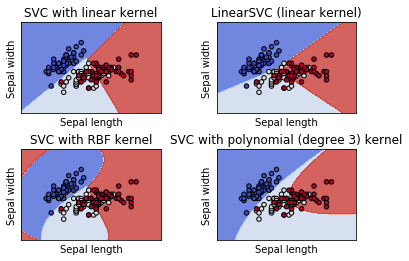

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()